## Imports

In [1]:
from pyjavaproperties import Properties
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

## Settings to enable real-time output from a shell command

In [2]:
from subprocess import Popen, PIPE, STDOUT
from IPython.core.magic import register_line_magic

@register_line_magic
def runrealcmd(command):
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True)
    for line in iter(process.stdout.readline, b''):
        print(line.rstrip().decode('utf-8'))
    process.stdout.close()
    process.wait()

### Download the input file from here:
http://download.smartdatalake.eu/datasets/dblp/dblp_papers.csv.zip

# 1. Vary the similarity threshold

## 1.a Load and optionally edit the config file

In [3]:
config_file_example = '../config.properties.example'
config_file = '../config.properties'
input_file = '../data/dblp_papers.csv'
output_file = '../data/output/dblp_papers_selfjoin_out.csv'
stats_file = '../data/output/stats.csv'

In [4]:
params = Properties()
params.load(open(config_file_example))
params['input_file'] = input_file
params['output_file'] = output_file
params['stats_file'] = stats_file
params['operation'] = 'self-join'
params['mode'] = 'standard'
params['return_counts'] = 'true'
params['set_column'] = '1'
params['tokens_column'] = '2'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['max_lines'] = '100000'

## 1.b Run the experiment

In [5]:
stats = pd.DataFrame(0, index=[0.5, 0.6, 0.7, 0.8, 0.9], columns=['NumMatches', 'Time'])
results = Properties()
for thres in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print('Threshold is {}'.format(thres))
    params['sim_threshold']= str(thres)
    params.store(open(config_file, 'w'))
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    results.load(open(stats_file))
    stats.loc[thres,'NumMatches'] = results['totalMatches']
    stats.loc[thres,'Time'] = results['joinTime']

Threshold is 0.5
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Transform time: 0.982047513 sec.
Join time: 1.768458945 sec.
Total Matches: 1727
Threshold is 0.6
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Transform time: 0.973840017 sec.
Join time: 0.694440579 sec.
Total Matches: 359
Threshold is 0.7
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Transform time: 0.901275374 sec.
Join time: 0.363657883 sec.
Total Matches: 90
Threshold is 0.8
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Transform time: 1.036681246 sec.
Join time: 0.221509152 sec.
Total Matches: 26
Threshold is 0.9
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per

In [6]:
stats

,NumMatches,Time
0.5,1727,1.768458945
0.6,359,0.694440579
0.7,90,0.363657883
0.8,26,0.221509152
0.9,6,0.084938953


## 1.c Plot the results

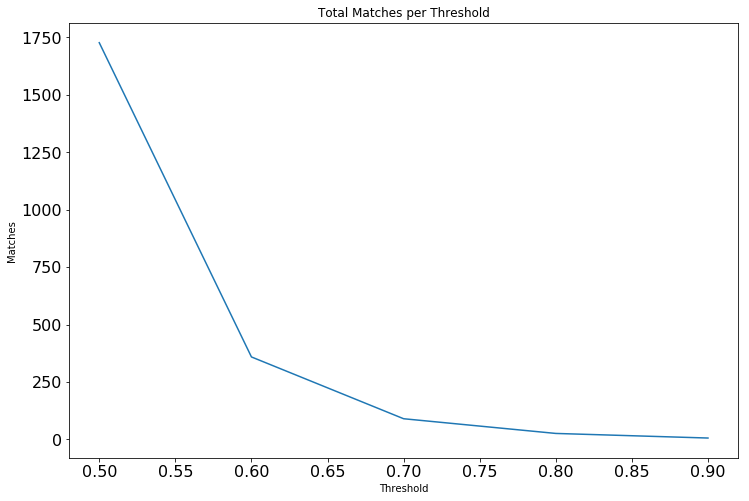

In [7]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Threshold')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Threshold')

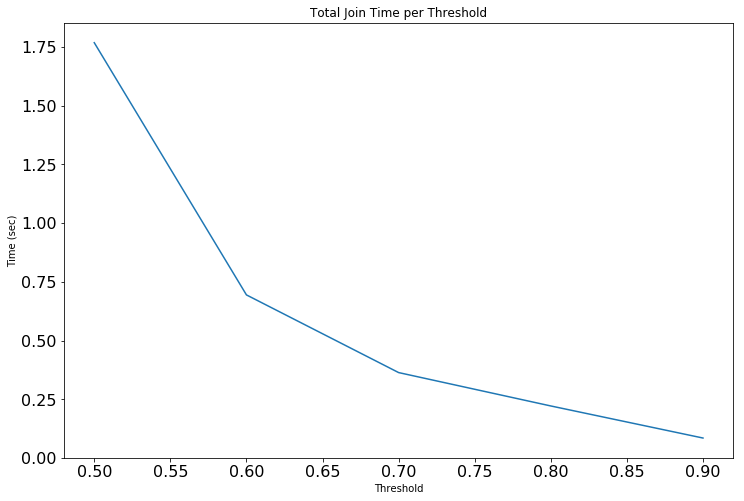

In [8]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Threshold')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Threshold')

# 2. Vary dataset size

## 2.a Load and optionally edit the config file

In [9]:
params = Properties()
params.load(open(config_file_example))
params['input_file'] = input_file
params['output_file'] = output_file
params['stats_file'] = stats_file
params['operation'] = 'self-join'
params['mode'] = 'standard'
params['return_counts'] = 'true'
params['set_column'] = '1'
params['tokens_column'] = '2'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['sim_threshold']= '0.8'

## 2.b Run the experiment

In [10]:
stats = pd.DataFrame(0, index=np.arange(.2,1.1,.2), columns=['NumMatches', 'Time'])
results = Properties()
size = 1000000
for prop in np.arange(.2,1.1,.2):
    print('Size is {}% or {:,}'.format(int(prop*100), int(prop*size)))
    params['max_lines']= str(int(prop*size))
    params.store(open(config_file, 'w'))
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    results.load(open(stats_file))
    stats.loc[prop,'NumMatches'] = results['totalMatches']
    stats.loc[prop,'Time'] = results['joinTime']

Size is 20% or 200,000
Finished reading file. Lines read: 200000. Lines skipped due to errors: 0. Num of sets: 200000. Elements per set: 9.019485
Transform time: 1.90548802 sec.
Join time: 0.711080417 sec.
Total Matches: 119
Size is 40% or 400,000
Finished reading file. Lines read: 400000. Lines skipped due to errors: 0. Num of sets: 400000. Elements per set: 9.030205
Transform time: 3.533833636 sec.
Join time: 1.375288872 sec.
Total Matches: 412
Size is 60% or 600,000
Finished reading file. Lines read: 600000. Lines skipped due to errors: 0. Num of sets: 600000. Elements per set: 8.987783333333333
Transform time: 4.443179219 sec.
Join time: 2.82524349 sec.
Total Matches: 942
Size is 80% or 800,000
Finished reading file. Lines read: 800000. Lines skipped due to errors: 0. Num of sets: 800000. Elements per set: 9.08888375
Transform time: 6.451925147 sec.
Join time: 6.931095994 sec.
Total Matches: 1408
Size is 100% or 1,000,000
Finished reading file. Lines read: 1000000. Lines skipped du

In [11]:
stats

,NumMatches,Time
0.2,119,0.711080417
0.4,412,1.375288872
0.6,942,2.82524349
0.8,1408,6.931095994
1.0,2036,12.574373249


## 2.c Plot the results

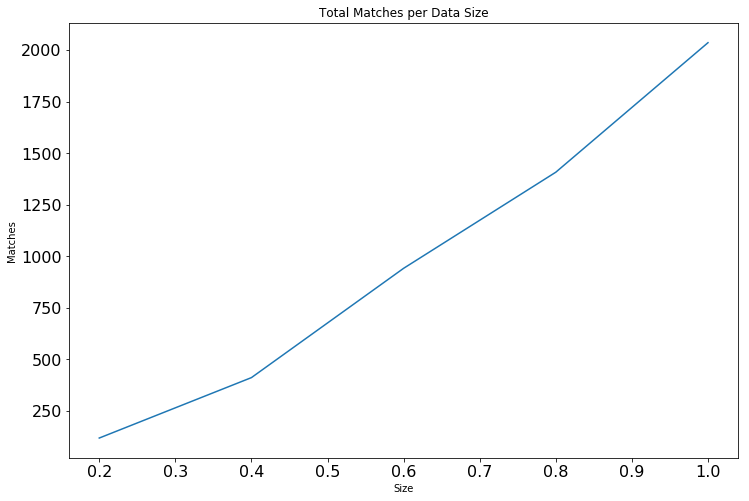

In [12]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Size')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Data Size')

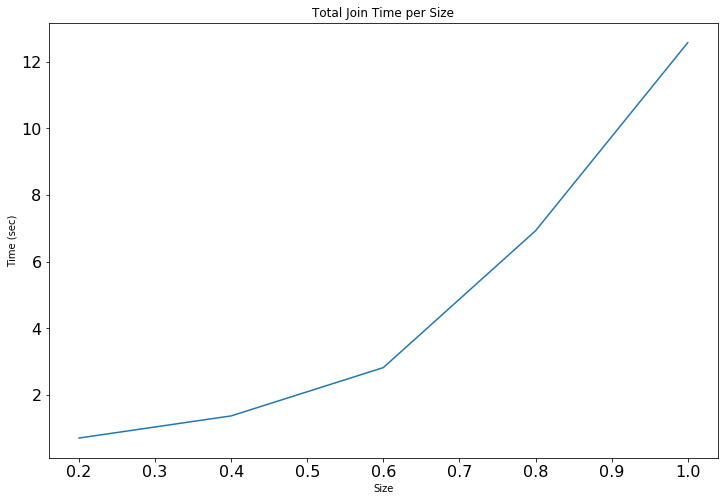

In [13]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Size')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Size')

# 3. Histogram of similarity scores

## 3.a Load and optionally edit the config file

In [14]:
params = Properties()
params.load(open(config_file_example))
params['input_file'] = input_file
params['output_file'] = output_file
params['stats_file'] = stats_file
params['operation'] = 'self-join'
params['mode'] = 'standard'
params['set_column'] = '1'
params['tokens_column'] = '2'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['sim_threshold']= '0.6'
params['max_lines'] = '100000'
params['return_counts'] = 'false'
params.store(open(config_file, 'w'))

## 3.b Run the experiment

In [15]:
%runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file

Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Transform time: 0.957373444 sec.
Join time: 1.296232427 sec.
Total Matches: 359


## 3.c Plot the results

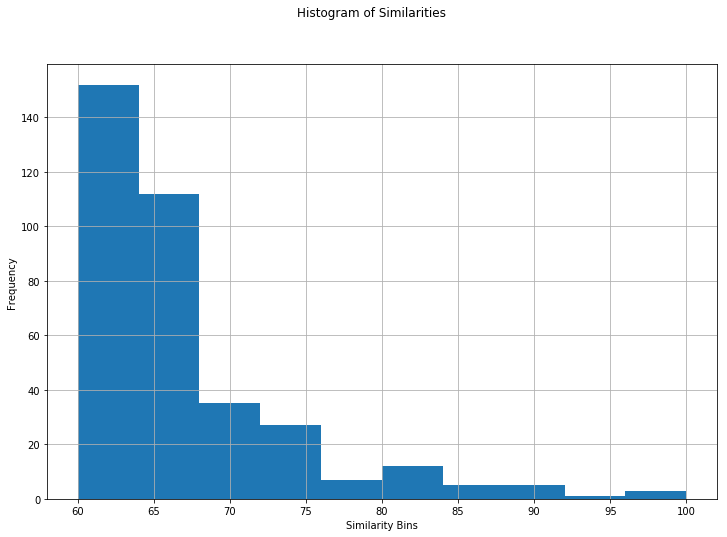

In [16]:
out1 = pd.read_csv(output_file, header=None, names=['Paper_ID_1', 'Paper_ID_2', 'Similarity'])
out1['Bin'] = (out1.Similarity*100).astype('int')
out1.head()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Similarity Bins')
ax.set_ylabel('Frequency')
pl.suptitle("Histogram of Similarities")
out1.Bin.hist()